### Importing essential libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

%matplotlib inline

### Reading data from CSV

In [3]:
house_prices = pd.read_csv('Average-prices-Property-Type-2021-05_wrangled.csv')

### Briefly analyzing the data

In [4]:
house_prices['averagePrice'].describe()

count       168.000000
mean     285456.482469
std      191571.264101
min       46886.384280
25%      145815.543250
50%      244809.889850
75%      369201.454800
max      968220.510300
Name: averagePrice, dtype: float64

In [5]:
house_prices.tail(10)

,Date,Region_Name,propertyType,averagePrice
158,2017-04-01,London,Flat,428540.6399
159,2017-04-01,Newcastle upon Tyne,Flat,109630.3630
160,2018-04-01,London,Flat,420314.5303
161,2018-04-01,Newcastle upon Tyne,Flat,112594.9800
162,2019-04-01,London,Flat,411728.2298
163,2019-04-01,Newcastle upon Tyne,Flat,108411.0246
164,2020-04-01,London,Flat,412701.7408
165,2020-04-01,Newcastle upon Tyne,Flat,106345.4930
166,2021-04-01,London,Flat,427992.3715
167,2021-04-01,Newcastle upon Tyne,Flat,114659.7908


In [6]:
house_prices["Date"] = pd.to_datetime(house_prices["Date"])
house_prices = house_prices.set_index("Date")

In [7]:
startdate = pd.to_datetime('2017-01-01')
enddate = pd.to_datetime('2021-1-1')

df17 = house_prices.sort_index().loc[startdate:enddate]

ncl = df17[df17["Region_Name"] == "Newcastle upon Tyne"]
lon = df17[df17["Region_Name"] == "London"]

In [8]:
n_det = ncl[ncl['propertyType'] == 'Detached']
n_semi = ncl[ncl['propertyType'] == 'Semi_Detached']
n_ter = ncl[ncl['propertyType'] == 'Terraced']
n_flat = ncl[ncl['propertyType'] == 'Flat']

l_det = lon[lon['propertyType'] == 'Detached']
l_semi = lon[lon['propertyType'] == 'Semi_Detached']
l_ter = lon[lon['propertyType'] == 'Terraced']
l_flat = lon[lon['propertyType'] == 'Flat']

In [9]:
lon['averagePrice'].describe()

count        16.000000
mean     597316.105881
std      190592.847718
min      411728.229800
25%      473237.421050
50%      535186.818250
75%      660794.328550
max      921807.028300
Name: averagePrice, dtype: float64

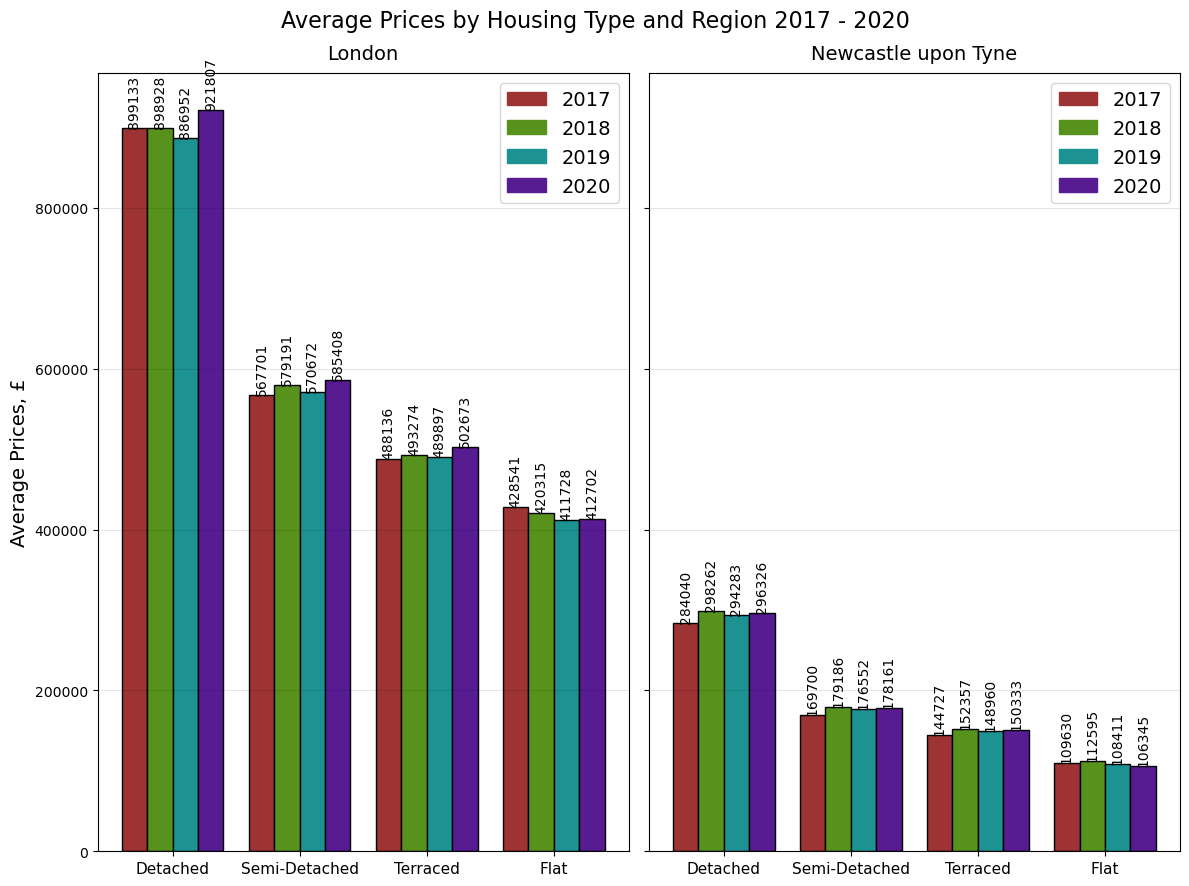

In [30]:
plt.rcdefaults()

# Plots and figure
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)
fig.set_size_inches(12, 9)


# x coordinates for the bars and x-axis labels
width = 0.2

tick_coor = [0, 1, 2, 3]
diff = [-0.3, -0.1, 0.1, 0.3]
colors = ['#9d3333', '#57921c', '#1c9292', '#571c92']



x1 = [tick_coor[0] + n for n in diff]
x2 = [tick_coor[1] + n for n in diff]
x3 = [tick_coor[2] + n for n in diff]
x4 = [tick_coor[3] + n for n in diff]

# Newcastle upon Tyne
# Bar chart labels
ax1.set_xticks(tick_coor)
x_labels = ["Detached", "Semi-Detached", "Terraced", "Flat"]
ax1.set_xticklabels(x_labels, fontsize = 11)

ax1.set_ylabel('Average Prices, £', fontsize = 14)
ax1.yaxis.grid(color='black', which='both', alpha=0.1)


ax1.set_title('London', fontsize = 14, pad = 10)
fig.suptitle('Average Prices by Housing Type and Region 2017 - 2020', fontsize=16)

# Plotting
ax1.bar(x1, l_det['averagePrice'], width, edgecolor='black', color=colors)
ax1.bar(x2, l_semi['averagePrice'], width, edgecolor='black', color=colors)
ax1.bar(x3, l_ter['averagePrice'], width, edgecolor='black', color=colors)
ax1.bar(x4, l_flat['averagePrice'], width, edgecolor='black', color=colors)


# London
# Bar chart labels
ax2.set_xticks(tick_coor)
x_labels = ["Detached", "Semi-Detached", "Terraced", "Flat"]
ax2.set_xticklabels(x_labels, fontsize = 11)

#ax2.tick_params(axis='y', which='both', top=False, bottom=False)
ax2.yaxis.grid(color='black', which='both', alpha=0.1)
ax2.set_title('Newcastle upon Tyne', fontsize = 14, pad = 10)

# Plotting
ax2.bar(x1, n_det['averagePrice'], width, edgecolor='black', color=colors)
ax2.bar(x2, n_semi['averagePrice'], width, edgecolor='black', color=colors)
ax2.bar(x3, n_ter['averagePrice'], width, edgecolor='black', color=colors)
ax2.bar(x4, n_flat['averagePrice'], width, edgecolor='black', color=colors)

for i in range(4):
    ax1.bar_label(ax1.containers[i],rotation = 90)
    ax2.bar_label(ax2.containers[i], rotation = 90)



#Setting Legend
b1 = mpatches.Patch(color=colors[0], label='2017')
b2 = mpatches.Patch(color=colors[1], label='2018')
b3 = mpatches.Patch(color=colors[2], label='2019')
b4 = mpatches.Patch(color=colors[3], label='2020')
ax1.legend(handles=[b1, b2, b3, b4], fontsize = 14)
ax2.legend(handles=[b1, b2, b3, b4], fontsize = 14)


plt.tight_layout()
plt.savefig("Average Prices Bar Chart")